# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



<Axes: >

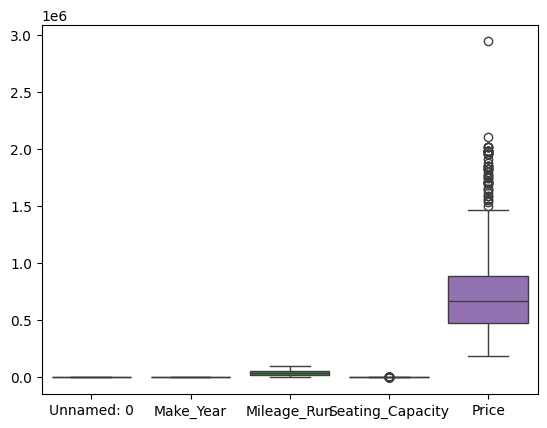

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Replace the URL with your GitHub raw CSV link
url = "https://raw.githubusercontent.com/annagirerd/linearRegression/refs/heads/main/data/cars_hw.csv"

# Load the data from GitHub
df = pd.read_csv(url)


df0 = df # Save the original data for a few plots
sns.boxplot(data=df)

Index(['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run',
       'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission',
       'Transmission_Type', 'Price'],
      dtype='object')


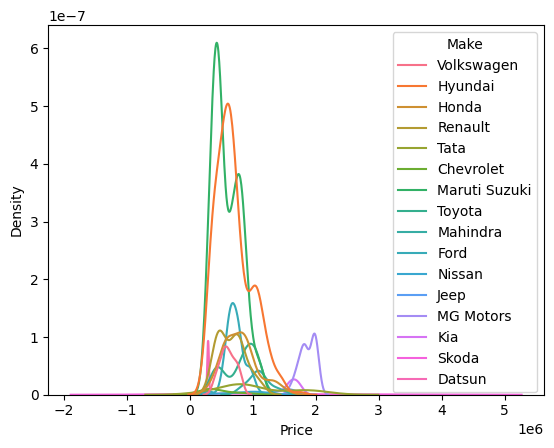

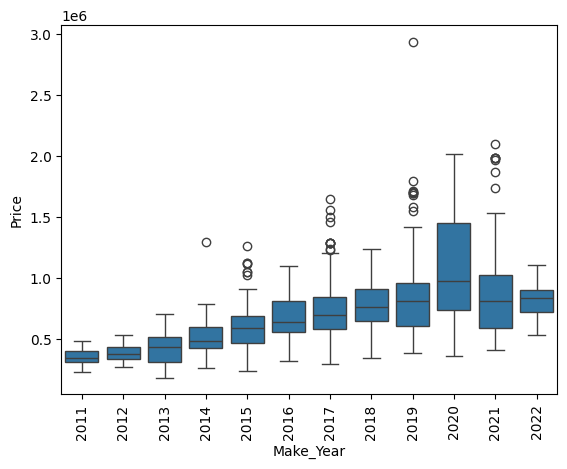

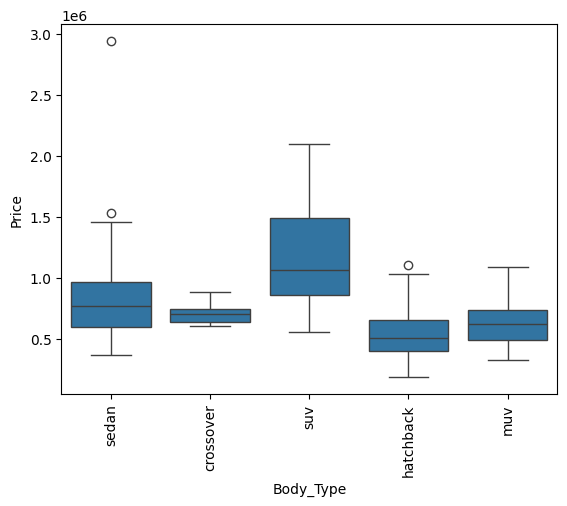

Body_Type
hatchback    484
sedan        227
suv          206
muv           38
crossover     21
Name: count, dtype: int64


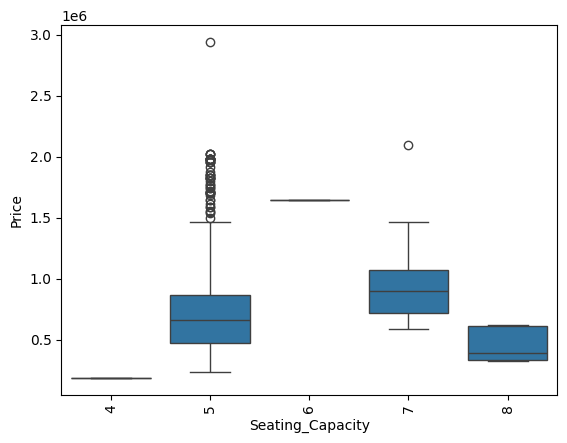

Seating_Capacity
5    930
7     39
8      5
6      1
4      1
Name: count, dtype: int64


In [2]:



# Column names and exploring variables
print(df.columns)

# Kernel density plots
# Make by price
sns.kdeplot(x=df['Price'], hue=df['Make'])
plt.show()


sns.boxplot(x='Make_Year', y='Price', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels if there are many years
plt.show()

# Body Type Options
sns.boxplot(x='Body_Type', y='Price', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels if there are many years
plt.show()

frequency_body = df["Body_Type"].value_counts()
print(frequency_body)

# Body Type Options
sns.boxplot(x="Seating_Capacity", y='Price', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels if there are many years
plt.show()

frequency = df["Seating_Capacity"].value_counts()
print(frequency)


Think that the seating capacity data can be hard to work with because 5 seat cars are 930 and the 7,8,6,4 seat cars are negligible. Hatchback seems lower in price than sedan.

In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         976 non-null    int64 
 1   Make               976 non-null    object
 2   Make_Year          976 non-null    int64 
 3   Color              976 non-null    object
 4   Body_Type          976 non-null    object
 5   Mileage_Run        976 non-null    int64 
 6   No_of_Owners       976 non-null    object
 7   Seating_Capacity   976 non-null    int64 
 8   Fuel_Type          976 non-null    object
 9   Transmission       976 non-null    object
 10  Transmission_Type  976 non-null    object
 11  Price              976 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 91.6+ KB
None
       Unnamed: 0    Make_Year   Mileage_Run  Seating_Capacity         Price
count  976.000000   976.000000    976.000000        976.000000  9.760000e+02
mean   488.500000  2016.963

Text(0.5, 1.0, 'Distribution of Price')

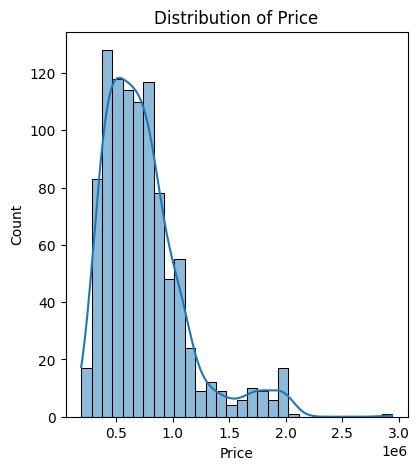

In [4]:
plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
sns.histplot(df['Price'], kde=True, bins=30)
plt.title('Distribution of Price')


skew right

2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.


In [5]:
# Transform categorical variables (of interest) for use in regression
# Make
X1 = pd.get_dummies(df['Make'], dtype=float)
# Body Type
X2 = pd.get_dummies(df['Body_Type'], dtype=float)
# Transmission Type
X3 = pd.get_dummies(df['Transmission_Type'], dtype=float)


# Add to dataframe
df = pd.concat([df, X1, X2, X3], axis=1)

3. Implement an ~80/~20 train-test split. Put the test data aside.


In [14]:

from sklearn.model_selection import train_test_split
from sklearn import linear_model
y = df['Price']
X = df[['Make_Year']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

Z_train = X_train
Z_test = X_test

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test))
rmse = np.sqrt(np.mean((y_test - y_hat)**2))
print('RMSE: ', rmse)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

Rsq:  0.0021249217972528767
RMSE:  370158.66620115977


,variable,coefficient
0,Make_Year,366.513044


Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?

In [16]:
y = df['Price']
X = df[['Make']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Get all unique makes from the **training** data
all_makes = pd.unique(X_train['Make'])

# Create dummy variables with all unique makes for both training and testing data
# Ensure both use the same columns and handle missing values
Z_train = pd.get_dummies(X_train['Make'], columns=all_makes, dummy_na=False).reindex(columns=all_makes, fill_value=0)
Z_test = pd.get_dummies(X_test['Make'], columns=all_makes, dummy_na=False).reindex(columns=all_makes, fill_value=0)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test))
rmse = np.sqrt(np.mean((y_test - y_hat)**2))
print('RMSE: ', rmse)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

Rsq:  0.568455539322757
RMSE:  243423.55834632888


,variable,coefficient
0,Hyundai,6.947542e+05
1,Honda,8.146271e+05
2,MG Motors,1.876800e+06
3,Renault,6.687458e+05
4,Ford,7.355854e+05
5,Volkswagen,5.967368e+05
6,Maruti Suzuki,5.781772e+05
7,Tata,1.104833e+06
8,Toyota,8.143500e+05
9,Mahindra,1.094062e+06


In [18]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

y = df['Price']
X = df.loc[:,['Make_Year',"Body_Type"] ]
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

Z_train = pd.concat([X_train['Make_Year'],
                     pd.get_dummies(X_train["Body_Type"], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['Make_Year'],
                    pd.get_dummies(X_test["Body_Type"], dtype='int')], axis = 1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

Rsq:  0.6450345632476071
RMSE:  220771.4282213367


,variable,coefficient
0,Make_Year,5.162414e+04
1,crossover,-1.034484e+08
2,hatchback,-1.035656e+08
3,muv,-1.035470e+08
4,sedan,-1.033052e+08
5,suv,-1.030344e+08


High RMSE and R-squared = 0.57

In [19]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

y = df['Price']
X = df.loc[:,['Make_Year',"Body_Type"] ]
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

Z_train = pd.concat([X_train['Make_Year'],
                     pd.get_dummies(X_train["Body_Type"], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['Make_Year'],
                    pd.get_dummies(X_test["Body_Type"], dtype='int')], axis = 1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

Rsq:  0.6450345632476071
RMSE:  220771.4282213367


,variable,coefficient
0,Make_Year,5.162414e+04
1,crossover,-1.034484e+08
2,hatchback,-1.035656e+08
3,muv,-1.035470e+08
4,sedan,-1.033052e+08
5,suv,-1.030344e+08


In [20]:
y = df['Price']
X = df.loc[:,['Make_Year', 'Make', 'Mileage_Run', 'Body_Type']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Get all unique makes from the training data
all_makes = pd.unique(X_train['Make'])

# Create dummy variables with all unique makes for both training and testing data
# Ensure both use the same columns and handle missing values
Z_train = pd.concat([X_train['Make_Year'],
                     pd.get_dummies(X_train['Make'], columns=all_makes, dummy_na=False).reindex(columns=all_makes, fill_value=0),
                     X_train['Mileage_Run'], pd.get_dummies(X_train['Body_Type'])], axis = 1)
Z_test = pd.concat([X_test['Make_Year'],
                     pd.get_dummies(X_test['Make'], columns=all_makes, dummy_na=False).reindex(columns=all_makes, fill_value=0),
                     X_test['Mileage_Run'], pd.get_dummies(X_test['Body_Type'])], axis = 1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test))
rmse = np.sqrt(np.mean((y_test - y_hat)**2))
print('RMSE: ', rmse)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

Rsq:  0.8280710984543578
RMSE:  153647.06818145016


,variable,coefficient
0,Make_Year,4.890951e+04
1,Hyundai,-2.336378e+07
2,Honda,-2.338248e+07
3,MG Motors,-2.264317e+07
4,Renault,-2.356831e+07
5,Ford,-2.352732e+07
6,Volkswagen,-2.337582e+07
7,Maruti Suzuki,-2.344609e+07
8,Tata,-2.324472e+07
9,Toyota,-2.333403e+07


RMSE is incredibly high r sq = 0.83


5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

# Assuming df is already loaded and contains the necessary columns
y = df['Price']
X = df.loc[:, ['Make_Year', 'Make', 'Mileage_Run', 'Body_Type']]

# Add the interaction term
df['MakeYear_MileageRun'] = df['Make_Year'] * df['Mileage_Run']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Get all unique makes from the training data
all_makes = pd.unique(X_train['Make'])

# Create dummy variables and include the interaction term
Z_train = pd.concat([
    X_train['Make_Year'],
    X_train['Mileage_Run'],
    df.loc[X_train.index, 'MakeYear_MileageRun'],  # Add the interaction term for training
    pd.get_dummies(X_train['Make'], columns=all_makes, dummy_na=False).reindex(columns=all_makes, fill_value=0),
    pd.get_dummies(X_train['Body_Type'])
], axis=1)

Z_test = pd.concat([
    X_test['Make_Year'],
    X_test['Mileage_Run'],
    df.loc[X_test.index, 'MakeYear_MileageRun'],  # Add the interaction term for testing
    pd.get_dummies(X_test['Make'], columns=all_makes, dummy_na=False).reindex(columns=all_makes, fill_value=0),
    pd.get_dummies(X_test['Body_Type'])
], axis=1)

# Run the regression model
reg = LinearRegression(fit_intercept=False).fit(Z_train, y_train)

# Predict and evaluate the model
y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test, y_test))
rmse = np.sqrt(np.mean((y_test - y_hat) ** 2))
print('RMSE: ', rmse)

# Display the results as a DataFrame
results = pd.DataFrame({'variable': Z_train.columns, 'coefficient': reg.coef_})
results

Rsq:  0.8289787674766129
RMSE:  153240.95485484714


,variable,coefficient
0,Make_Year,3.961740e+04
1,Mileage_Run,-4.761649e+02
2,MakeYear_MileageRun,2.362448e-01
3,Hyundai,-1.890570e+07
4,Honda,-1.892510e+07
5,MG Motors,-1.818354e+07
6,Renault,-1.910355e+07
7,Ford,-1.906544e+07
8,Volkswagen,-1.890803e+07
9,Maruti Suzuki,-1.898454e+07


R-squared pretty good - .82- but RMSE still very high

Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
